<a href="https://colab.research.google.com/github/SerbC/04-ELECTRONICA-M-A1-S2-Tehnici-de-analiz-i-clasificare-automat-a-informa-iei-2020-/blob/main/hog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python ipyplot



        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


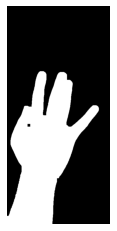

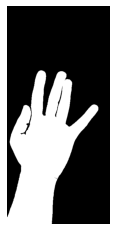

In [2]:
import cv2 #used to load the images (in the future it will have other uses)
import numpy as np
import glob #used to read image names
import random #used to generate tran/test split
import ipyplot #it will be explained
from matplotlib import pyplot as plt #for all ur plotting needs
import pickle
train_images_resized = pickle.load( open( "/content/drive/My Drive/fac/Laborator/Images/dump_train_images_resized", "rb" ) )
test_images_resized = pickle.load( open( "/content/drive/My Drive/fac/Laborator/Images/dump_test_images_resized", "rb" ) )

kernel = np.ones((10,10),np.float32)/100

img = train_images_resized[0][2][:,:,2]
img2 = cv2.filter2D(img,-1,kernel)

ret,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY) 
ret,th2 = cv2.threshold(img,90,255,cv2.THRESH_BINARY) 

th1 = cv2.erode(th1,kernel,iterations = 1)
th1 = cv2.dilate(th1,kernel,iterations = 1)
th1 = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.axis("off")
plt.imshow(th1,cmap='gray')
plt.figure()
plt.axis("off")
plt.imshow(th2,cmap='gray')

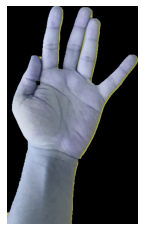

In [3]:
im = train_images_resized[0][2]

contours, hier = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

size = 0
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if size < w*h:
      size = w*h
      hand = im[ y:y+h, x:x+w, : ]
      hand_bw = th1[ y:y+h, x:x+w ]
      hand[hand_bw == 0] = 0
      #resized_hand = cv2.resize(hand, (416,416), interpolation = cv2.INTER_AREA)
      plt.figure()
      plt.axis("off")
      plt.imshow(hand)


In [4]:
hog = cv2.HOGDescriptor()
h = hog.compute(hand)
print(np.shape(h))

(7276500, 1)


In [5]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html
surf = cv2.xfeatures2d.SURF_create(400) #va descurcati voi
kp, des = surf.detectAndCompute(hand,None)


error: ignored

In [6]:
#https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html
surf = cv2.xfeatures2d.SIFT_create(400) #va descurcati voi
kp, des = surf.detectAndCompute(hand,None)


error: ignored

In [7]:
# https://docs.opencv.org/master/d5/d33/structcv_1_1HOGDescriptor.html
# https://www.youtube.com/watch?v=28xk5i1_7Zc

winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(hand,winStride,padding,locations)
print(np.shape(hist))

(1764, 1)
